# zad_15_6

#### Dla stworzonego wcześniej Pipeline’a wybierz najlepsze hiperparametry na podstawie podzbiorów walidacyjnych i siatki hiperparametrów (skorzystaj z GridSearch).

# zad_15_5

#### Wybierz zbiór danych z tych, które wykorzystywane były w module o regresji lub klasyfikacji. Dla któregoś z tych zbiorów stwórz Pipeline, w którym zawrzesz proces przygotowania danych i naucz nowy model, porównując go z tymi stworzonymi w tamtych modułach.

#### Rozwiązanie na końcu

#### Zadanie: pingwiny! <br>
 Wykorzystaj zbiór penguins.csv (pobierz), w którym są cechy dla różnych gatunków pingwinów, wykonaj eksploracj a następnie naucz poznane w tym <br> module modele

In [2]:
import pandas as pd
df = pd.read_csv('penguins.csv')
df

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [3]:
penguins=df.dropna()
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [4]:
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

In [5]:
pd.Series(y).value_counts(normalize=True)

0    0.441520
1    0.359649
2    0.198830
Name: Species, dtype: float64

In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


In [7]:
X.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
import matplotlib.pyplot as plt

Unique values: 164


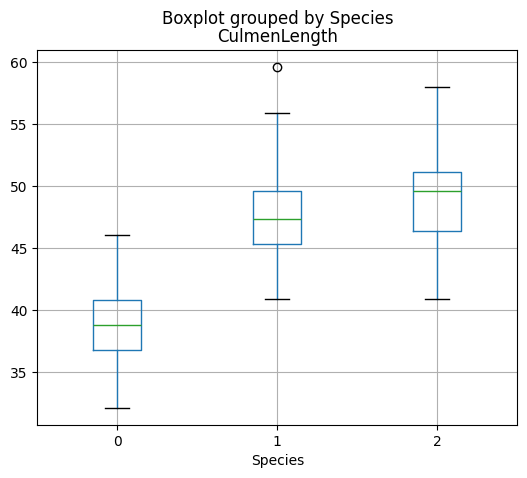

Unique values: 80


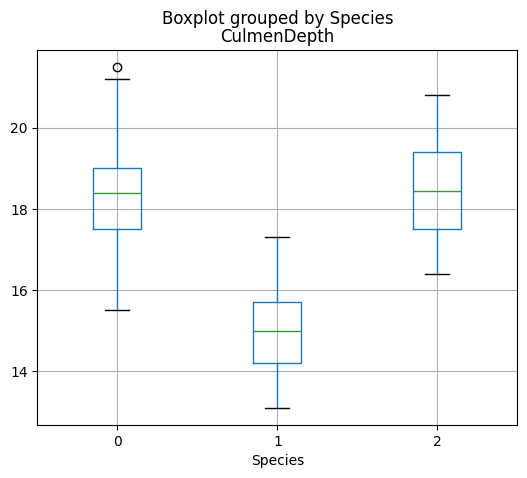

Unique values: 55


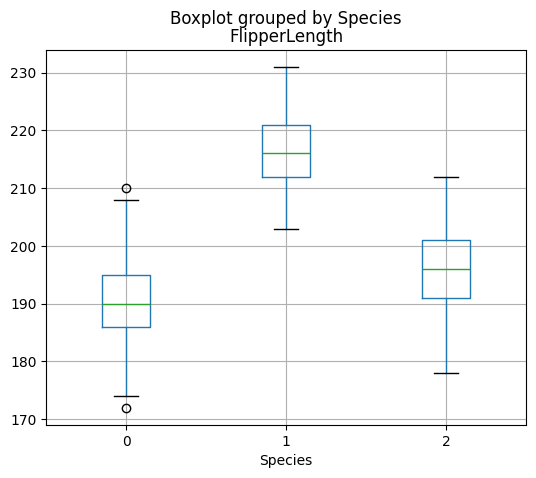

Unique values: 94


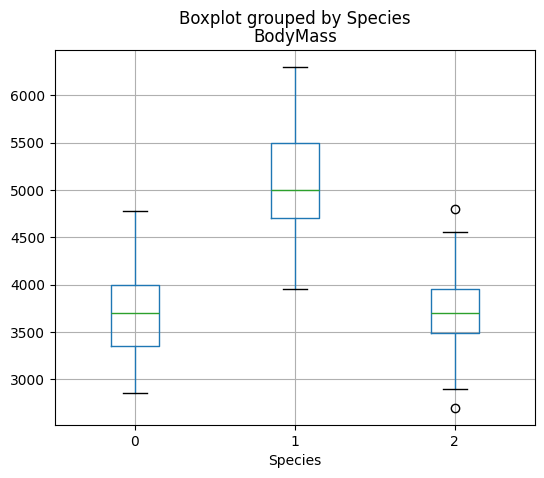

In [9]:
for col in features:
    print(f'Unique values: {len(penguins[col].unique())}')
    penguins.boxplot(column=col,by='Species',figsize=(6,5))
    plt.title(col)
    plt.show()


C:\Users\monas\AppData\Local\Temp\ipykernel_34480\330167455.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='0')
C:\Users\monas\AppData\Local\Temp\ipykernel_34480\330167455.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

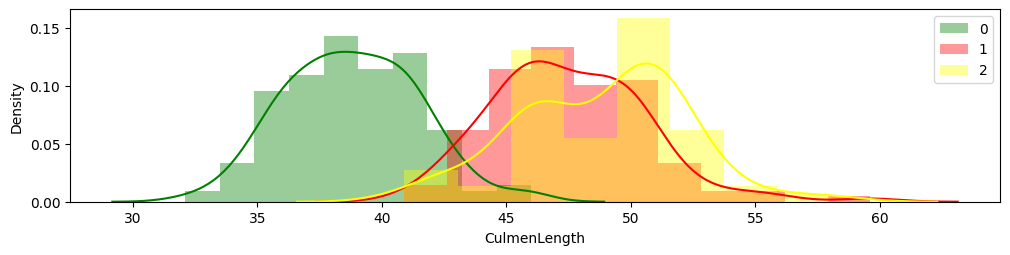

C:\Users\monas\AppData\Local\Temp\ipykernel_34480\330167455.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='0')
C:\Users\monas\AppData\Local\Temp\ipykernel_34480\330167455.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

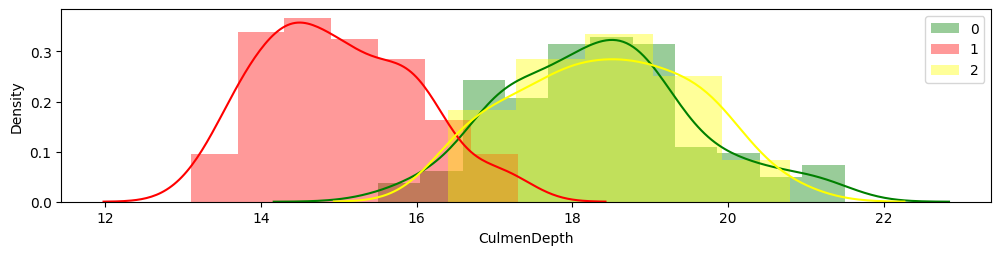

C:\Users\monas\AppData\Local\Temp\ipykernel_34480\330167455.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='0')
C:\Users\monas\AppData\Local\Temp\ipykernel_34480\330167455.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

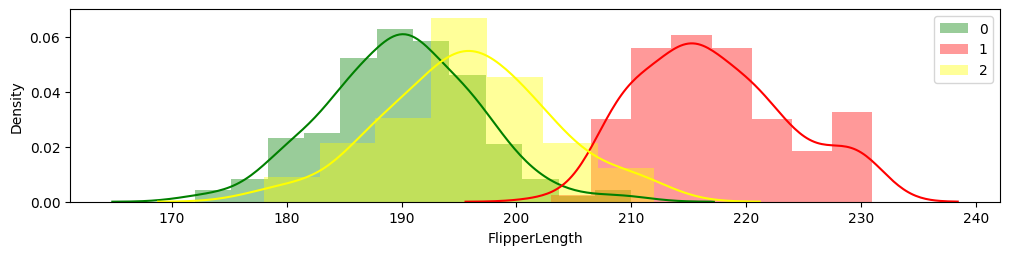

C:\Users\monas\AppData\Local\Temp\ipykernel_34480\330167455.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='0')
C:\Users\monas\AppData\Local\Temp\ipykernel_34480\330167455.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

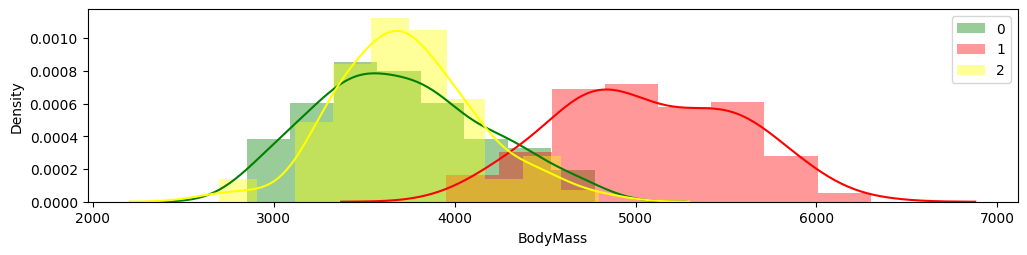

In [10]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='0')
    sns.distplot(penguins.loc[penguins['Species']==1, col], kde=True, color='red', label='1')
    sns.distplot(penguins.loc[penguins['Species']==2, col], kde=True, color='yellow', label='2')
    plt.legend(loc='upper right')
    plt.show()

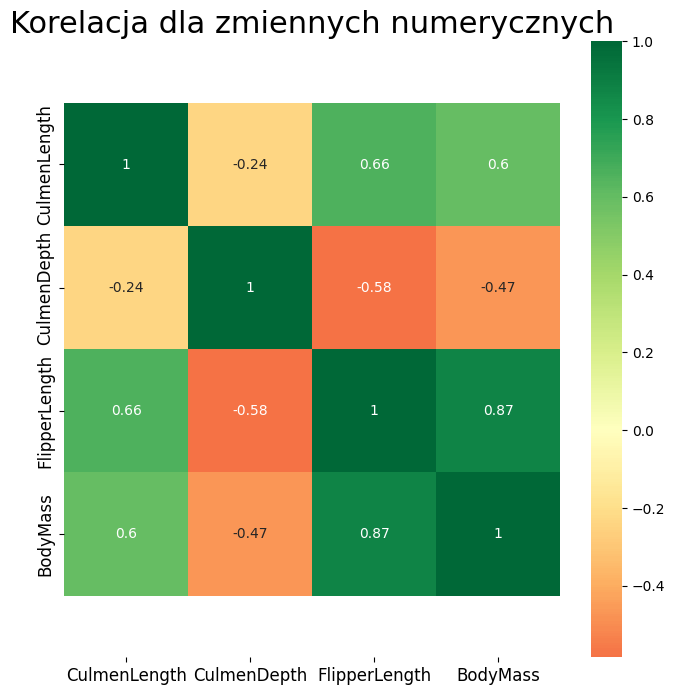

In [11]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [12]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.779857
FlipperLength    0.357472
BodyMass         0.209717
CulmenDepth     -0.183090
dtype: float64

#### Klasyfikacja -na podstawie 2 zmiennych

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X[['CulmenLength', 'FlipperLength']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))


Treningowe obserwacje: 239
Testowe obserwacje: 103


#### standaryzacja

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [16]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

#### funkcja

In [17]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

In [18]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    global metrics_dataframe
    models.append(model)
    models_names.append(name)

    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba)

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

    # ROC curves (dla wieloklasowej – osobno dla każdej klasy)
    n_classes = predictions_proba.shape[1]
    y_bin = pd.get_dummies(y_checked)  # binarizacja etykiet

    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin.iloc[:, i], predictions_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {i}')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

    # metryki globalne
    f1_metric = f1_score(y_checked, predictions, average='weighted')
    auc_metric = roc_auc_score(y_bin, predictions_proba, multi_class='ovr', average='weighted')

    metrics_dataframe = pd.concat([
        metrics_dataframe,
        pd.DataFrame([{'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric}])
    ], ignore_index=True)

    return metrics_dataframe

#### LogisticRegresion

In [19]:
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


C:\Users\monas\AppData\Local\Temp\ipykernel_34480\3248809346.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


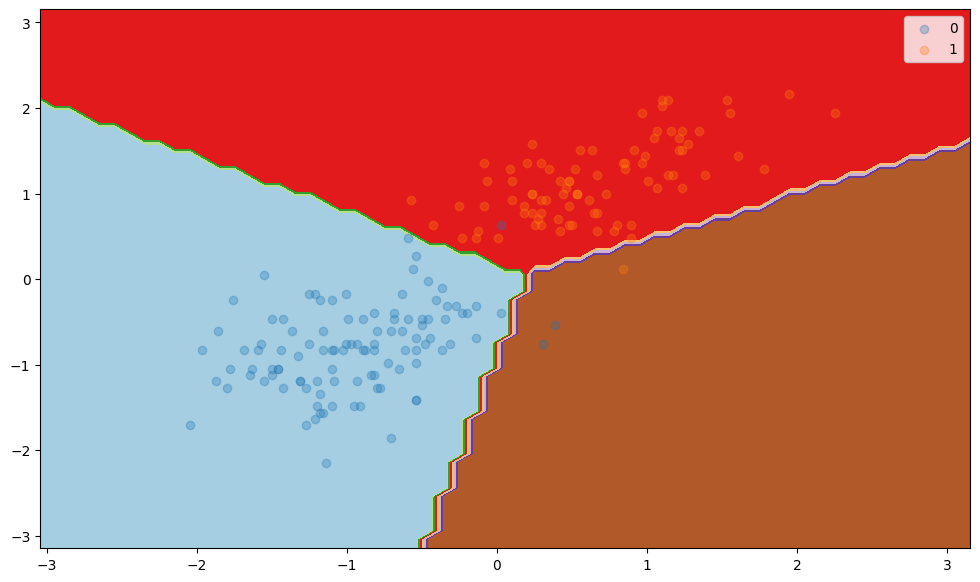

In [20]:

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

In [21]:
predictions_lr = model_lr.predict(X_test_standardized)
print('Predicted labels: ', predictions_lr[:5], predictions_lr[-5:])
print('Actual labels:    ' , y_test[:5].values, y_test[-5:].values)

Predicted labels:  [0 1 0 2 2] [1 0 1 0 2]
Actual labels:     [0 1 2 2 2] [1 0 1 0 2]


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



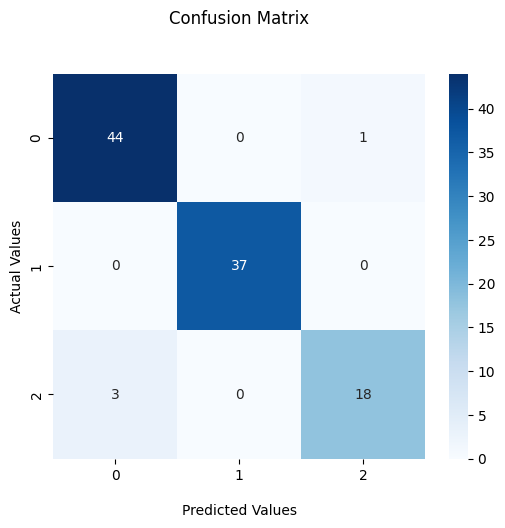

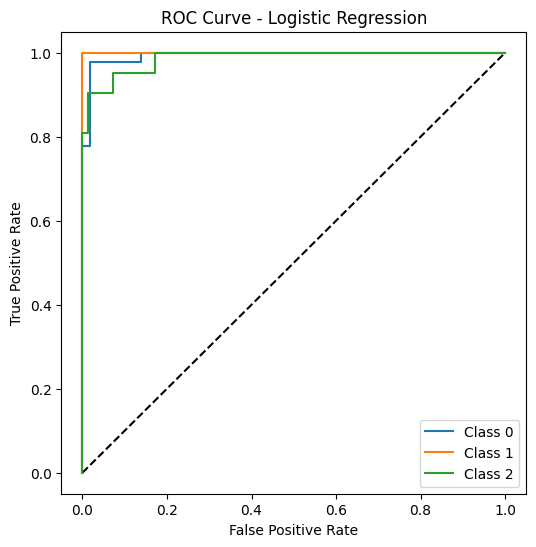

,Model,F1_score,AUC
0,Logistic Regression,0.960616,0.99455


In [22]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

wnioski dla modelu - Logistic Regression:
- modelbardzo dory
- bardzo dobrze radzi sobie z rozpoznaniem klasy 1
- troche gorzej radzi sobie z rozpoznaiem klas 0 i 2, ale nadal jest to bardzo dobry wynik
 - najwięcej problemow stwarza klasa 2, w ktorej jest najwięcej pomyłek - 14%


#### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\monas\AppData\Local\Temp\ipykernel_34480\3248809346.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


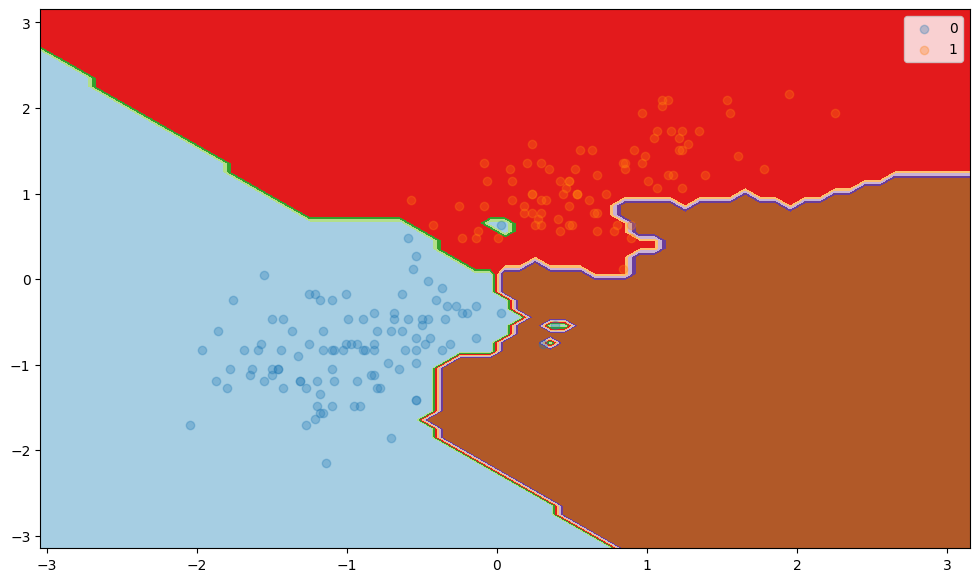

In [24]:
n_neighbors = max(1, int(X_train_standardized.shape[0] * 0.002))
model_knn = KNeighborsClassifier(n_neighbors= n_neighbors)
model_knn.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_knn)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       1.00      0.92      0.96        37
           2       0.79      0.90      0.84        21

    accuracy                           0.93       103
   macro avg       0.92      0.93      0.92       103
weighted avg       0.94      0.93      0.93       103



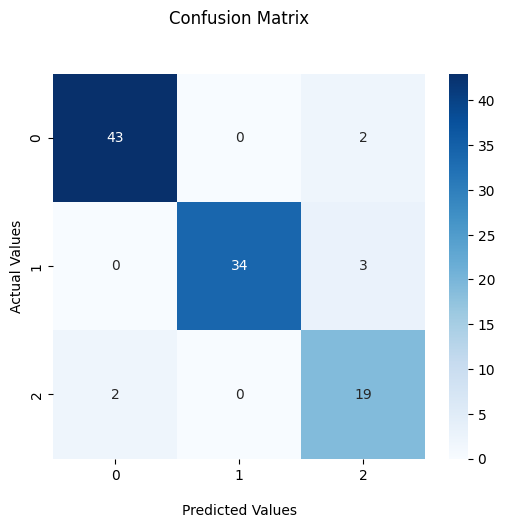

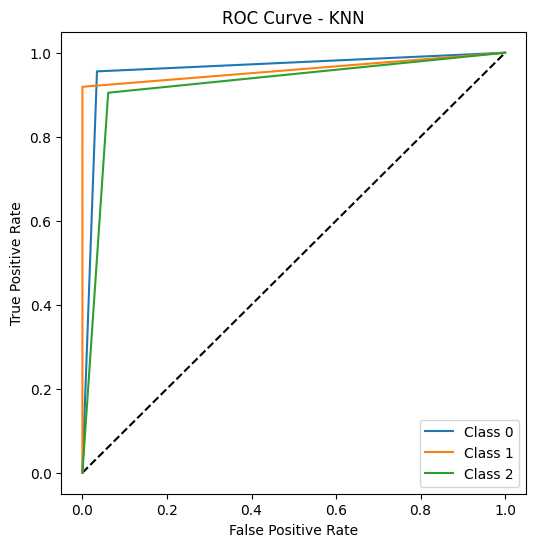

,Model,F1_score,AUC
0,Logistic Regression,0.960616,0.994550
1,KNN,0.933689,0.952271


In [25]:
calculate_metrics(model_knn, 'KNN', X_test_standardized, y_test)

Wnioski dla KNN:
- model równiez bardzo skuteczny - 93%
 -klasa 0 jest klasyfikowana prawie bezłbednie,
- klasa 1 brak falszywych rozpoznań, alekilka przeoczonych
- klasa 2 stwarza najwięcej problemów, sporo błednych klasyfikacji

#### Drzewo decyzyjne

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\monas\AppData\Local\Temp\ipykernel_34480\3248809346.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


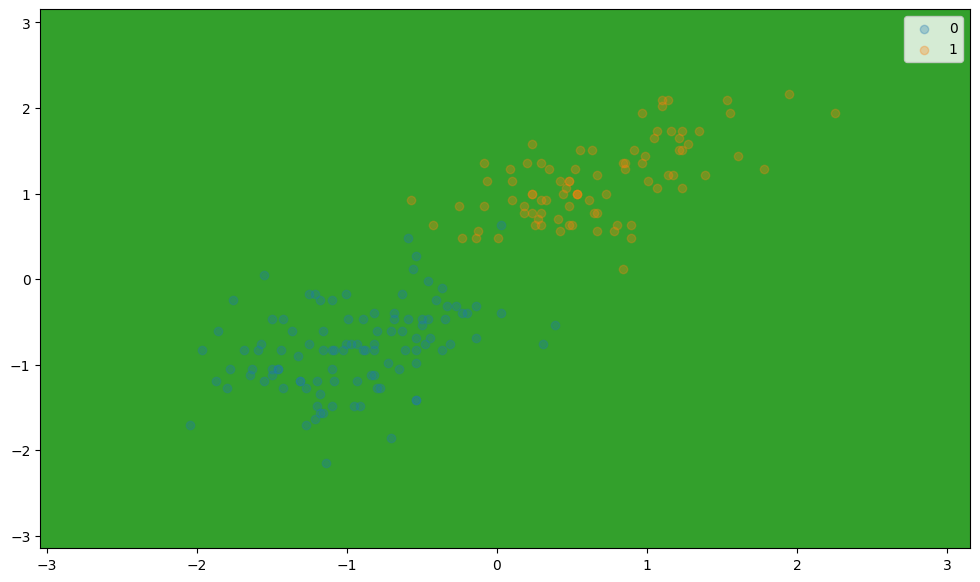

In [26]:
from sklearn.tree import DecisionTreeClassifier
min_samples_leaf = max(1, int(X_train.shape[0]*0.002))
model_tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=min_samples_leaf)
model_tree.fit(X_train, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_tree)

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulf

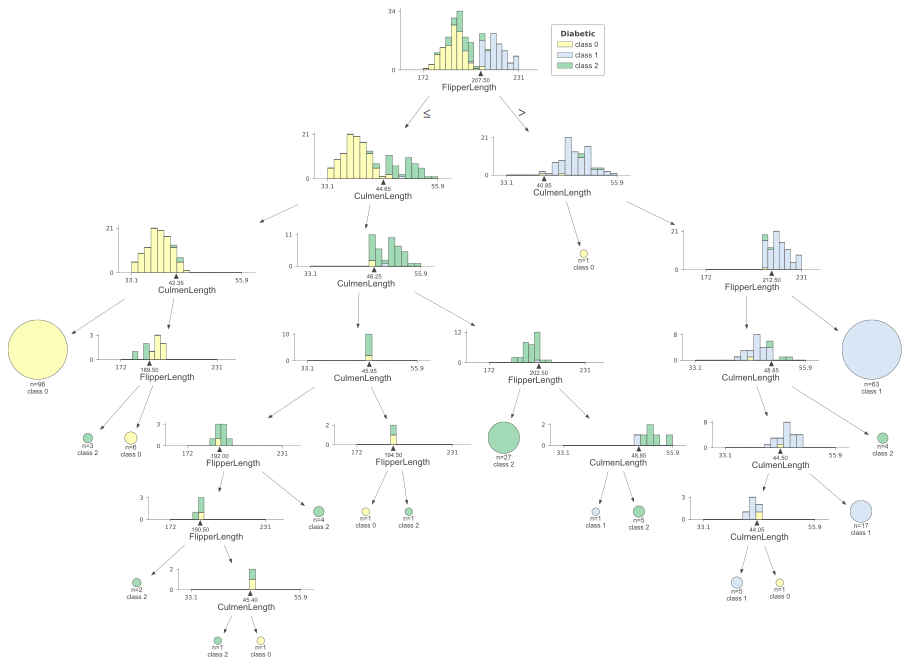

In [27]:
from dtreeviz import trees
viz = trees.dtreeviz(model_tree, x_data=X_train, y_data=y_train,
                     target_name='Diabetic', feature_names = X_train.columns)
viz

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 

              precision    recall  f1-score   support

           0       0.44      1.00      0.61        45
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        21

    accuracy                           0.44       103
   macro avg       0.15      0.33      0.20       103
weighted avg       0.19      0.44      0.27       103



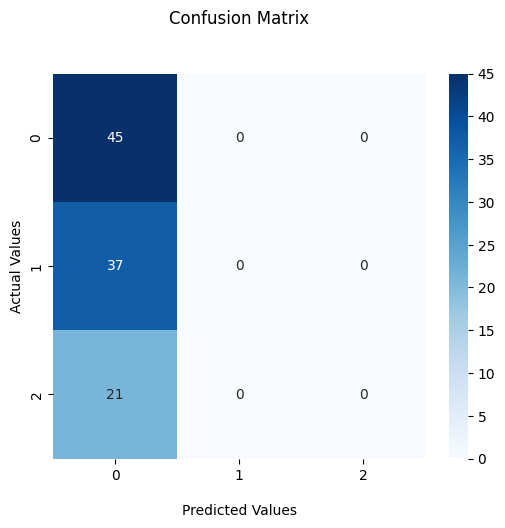

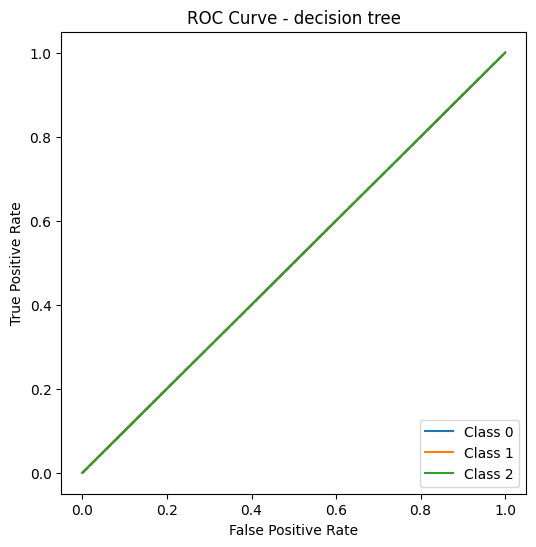

,Model,F1_score,AUC
0,Logistic Regression,0.960616,0.994550
1,KNN,0.933689,0.952271
2,decision tree,0.265678,0.500000


In [28]:
calculate_metrics(model_tree, 'decision tree', X_test_standardized, y_test)

Wnioski dla drzew decyzyjnego:
- model nauczyl sie klasyfikowac tylko jedną klasę -"0"
- wyglada to na przykład typowego przeuczenia się lub złego dobrania parametrów lub zbyt malej ilości informacji w cechach


#### SVM

C:\Users\monas\AppData\Local\Temp\ipykernel_34480\3248809346.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


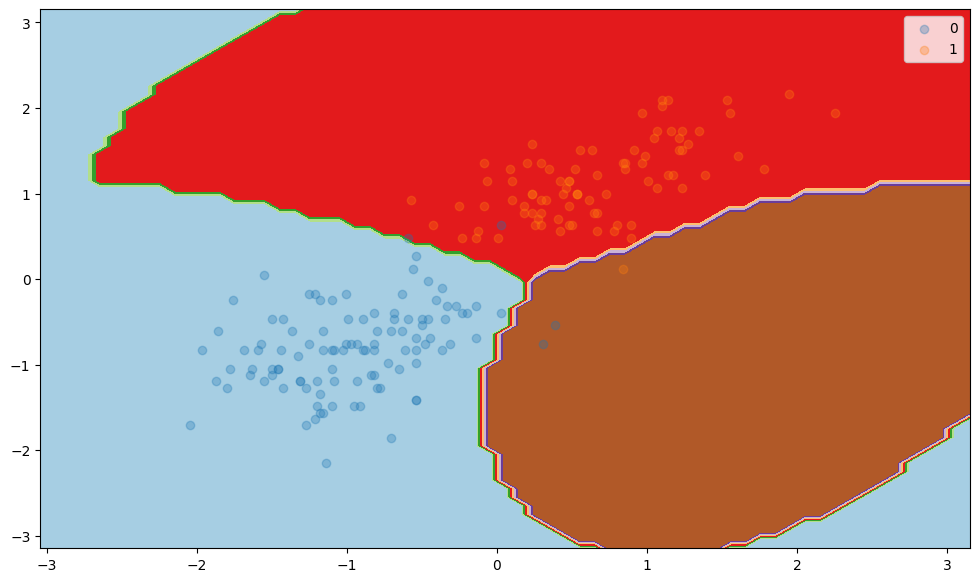

In [29]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_svm)

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramet

              precision    recall  f1-score   support

           0       0.44      1.00      0.61        45
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        21

    accuracy                           0.44       103
   macro avg       0.15      0.33      0.20       103
weighted avg       0.19      0.44      0.27       103



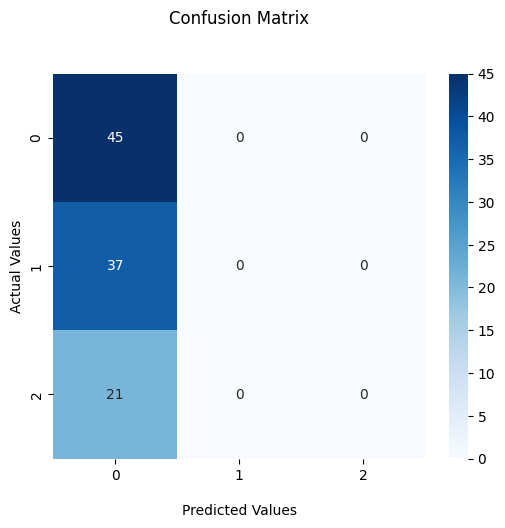

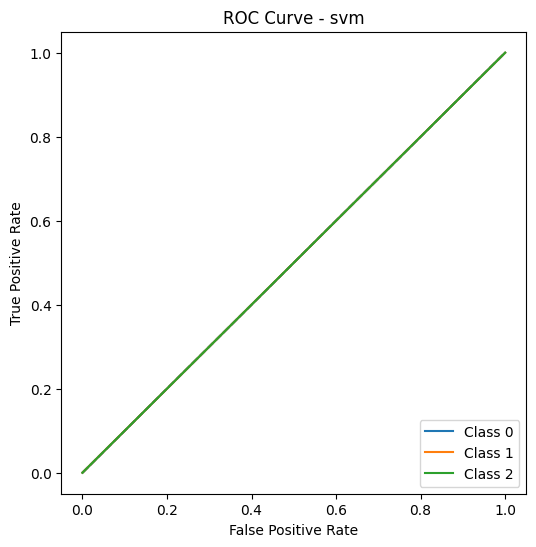

,Model,F1_score,AUC
0,Logistic Regression,0.960616,0.994550
1,KNN,0.933689,0.952271
2,decision tree,0.265678,0.500000
3,svm,0.265678,0.500000


In [30]:
calculate_metrics(model_svm, 'svm', X_test, y_test)

Wnioski dla SVM:
 - wyniki modelu podobne do drzew decyzyjnych,
 - model nauczyl sie rozpoznawać klasę "0" ignorujać pozostałę klasy,


#### Random Forest

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\monas\AppData\Local\Temp\ipykernel_34480\3248809346.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


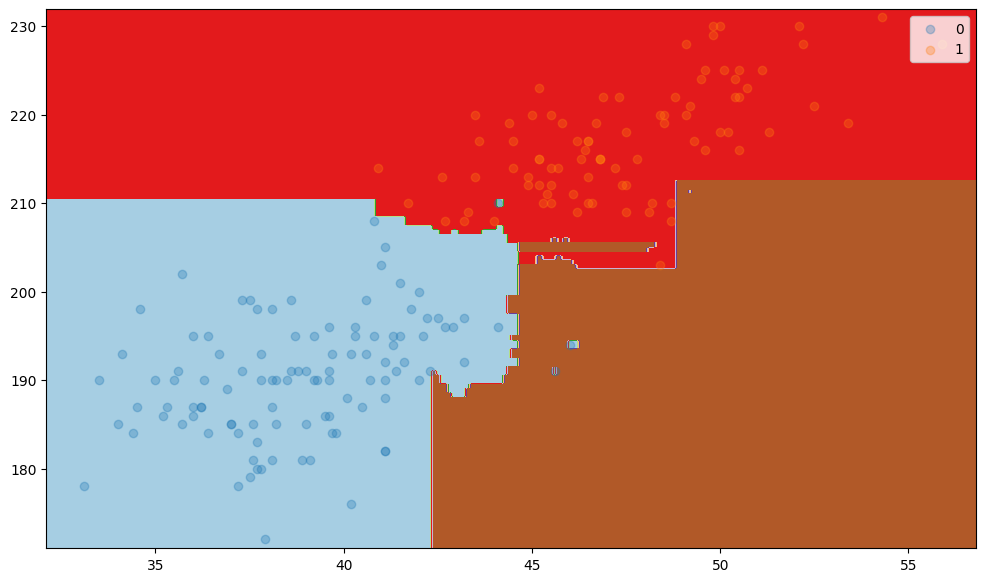

In [31]:
from sklearn.ensemble import RandomForestClassifier

#min_samples_leaf = math.ceil(X_train.shape[0] * 0.001)
min_samples_leaf = max(1, int(X_train.shape[0]*0.002))
model_forest = RandomForestClassifier(n_estimators=1000, max_depth=7, min_samples_leaf=min_samples_leaf)
model_forest.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_forest)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      0.97      0.99        37
           2       0.90      0.90      0.90        21

    accuracy                           0.96       103
   macro avg       0.95      0.95      0.95       103
weighted avg       0.96      0.96      0.96       103



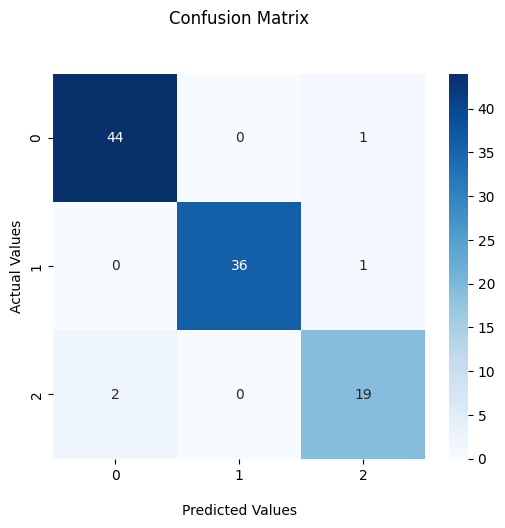

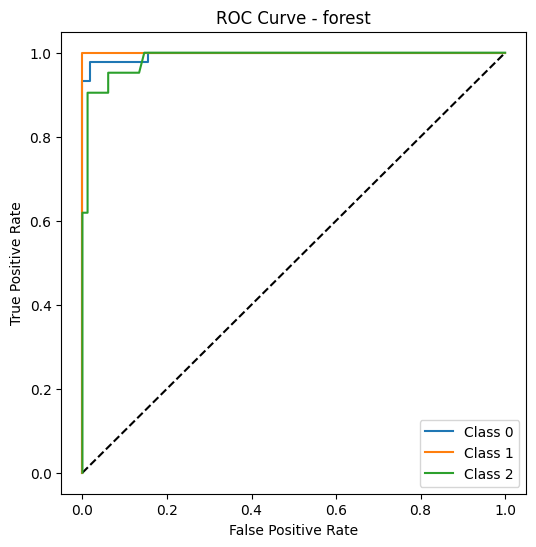

,Model,F1_score,AUC
0,Logistic Regression,0.960616,0.994550
1,KNN,0.933689,0.952271
2,decision tree,0.265678,0.500000
3,svm,0.265678,0.500000
4,forest,0.961259,0.995495


In [32]:
calculate_metrics(model_forest, 'forest', X_test, y_test)

Wyniki dla random forest:
- wyniki znacznie lepsze niz dla pojedynczego drzew decyzyjnego
- modellepiej generalizuje
- accurancy na poziomie 0.96, oznacz, ze model nauczył sie rozrózniać wszystkie klasy

#### Boosting — AdaBoos

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\monas\AppData\Local\Temp\ipykernel_34480\3248809346.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


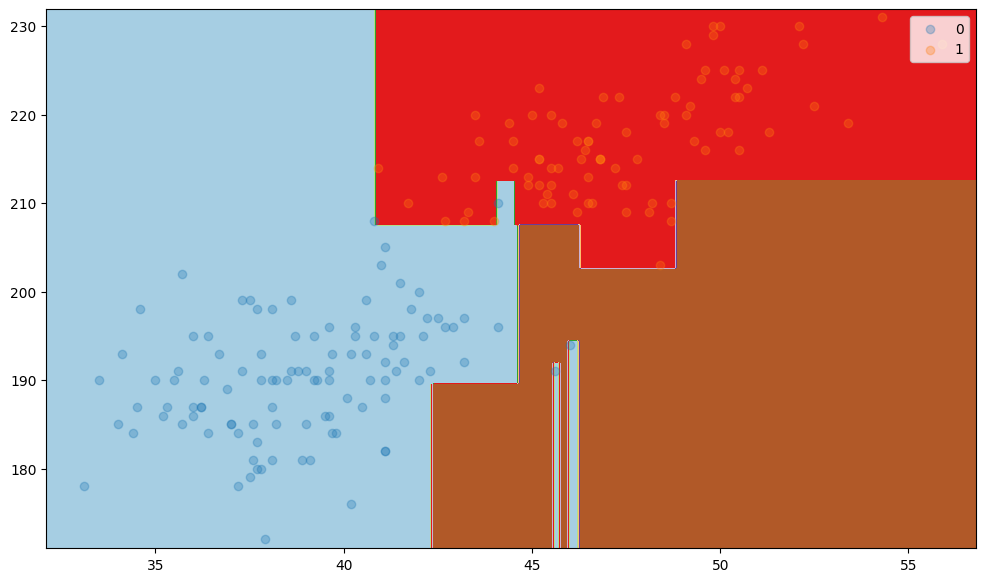

In [33]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=12), n_estimators=250)
model_adaboost.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_adaboost)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       1.00      0.95      0.97        37
           2       0.85      0.81      0.83        21

    accuracy                           0.93       103
   macro avg       0.92      0.91      0.92       103
weighted avg       0.93      0.93      0.93       103



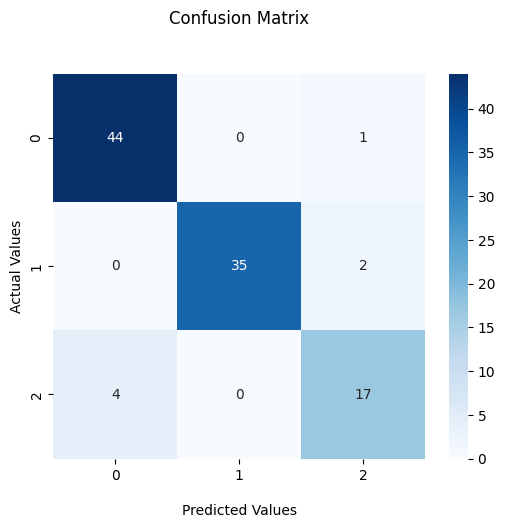

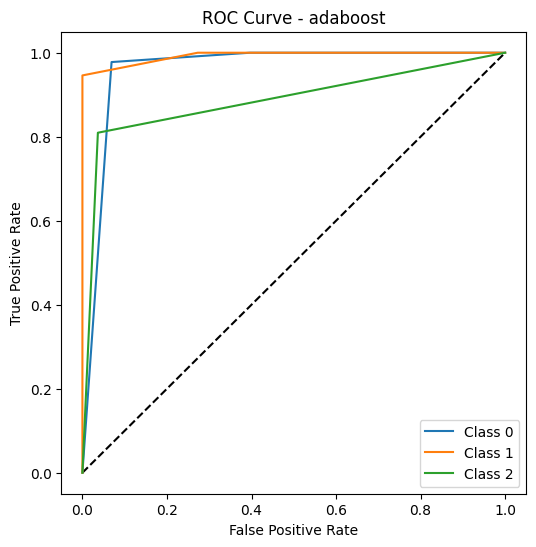

,Model,F1_score,AUC
0,Logistic Regression,0.960616,0.994550
1,KNN,0.933689,0.952271
2,decision tree,0.265678,0.500000
3,svm,0.265678,0.500000
4,forest,0.961259,0.995495
5,adaboost,0.931723,0.957215


In [34]:
calculate_metrics(model_adaboost, 'adaboost', X_test, y_test)

Wnioski dla Boosting — AdaBoos:
- model znacznie lepiej radzi sobie niz drzewo decyzyjne czy SVC, które skupily się tylko na jednej klasie
 -model bardzo dobrze radzi sobie z klasami "0" i "1", a klasa "2" choc trudniejsza, nadal daje dobre wyniki,
 

#### Ensembling – Zespół klasyfikatorów

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\monas\AppData\Local\Temp\ipykernel_34480\3248809346.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


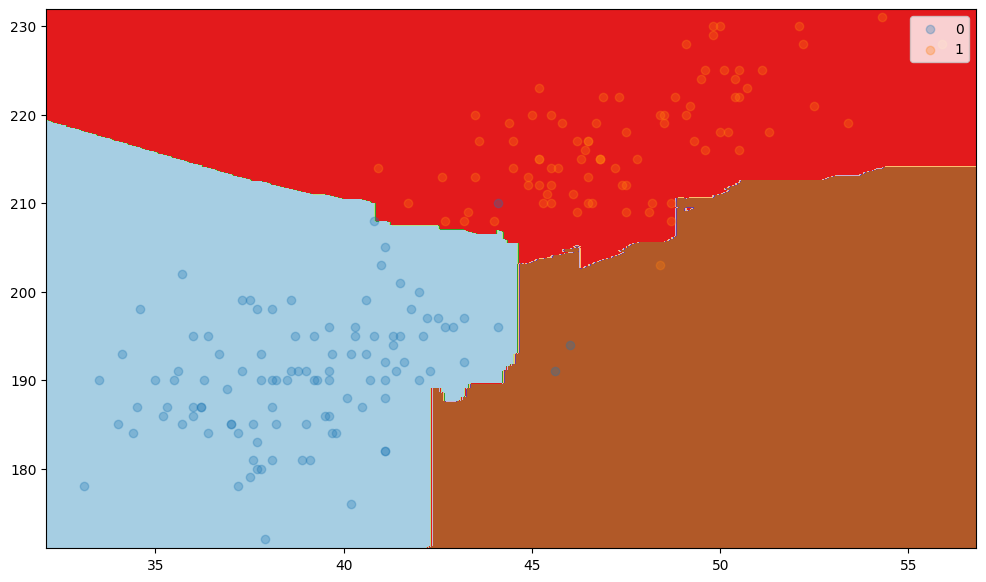

In [35]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Logistic Regresion', model_lr),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

model_voting.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_voting)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



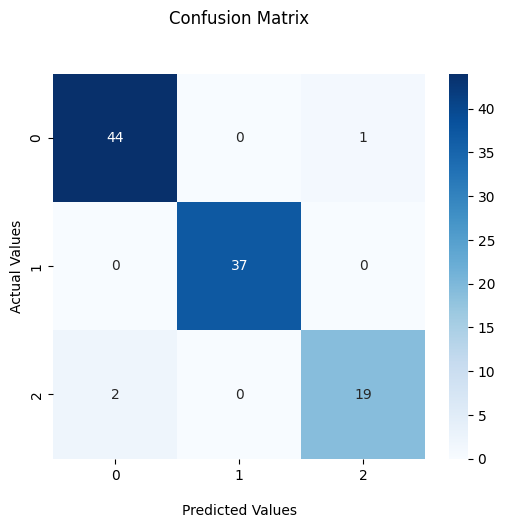

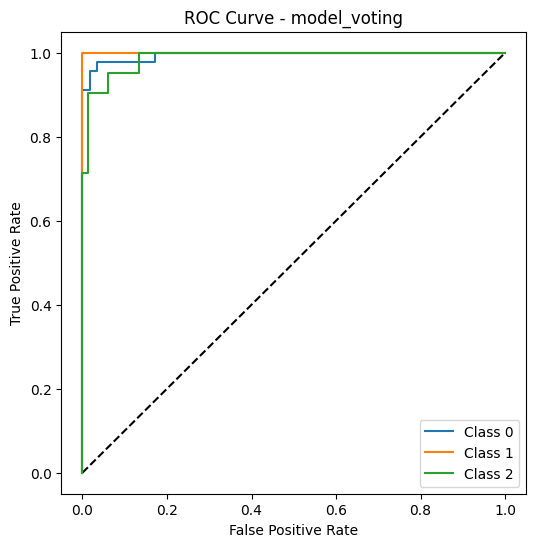

,Model,F1_score,AUC
0,Logistic Regression,0.960616,0.994550
1,KNN,0.933689,0.952271
2,decision tree,0.265678,0.500000
3,svm,0.265678,0.500000
4,forest,0.961259,0.995495
5,adaboost,0.931723,0.957215
6,model_voting,0.970679,0.995289


In [36]:
calculate_metrics(model_voting, 'model_voting', X_test, y_test)

Ensembling – Zespół klasyfikatorów:
Zespół klasyfikatorów - Ensembling zdecydowanie przewyższa pojedyncze modele takie jak Drzewo, SVM, a nawet KNN czy Logistic Regression.

Klasa 1 jest rozpoznawana perfekcyjnie, klasa 0 niemal bezbłędnie, a klasa 2 – choć trudniejsza – ma najwyższe dotąd wyniki (0.93 F1).

Accuracy na poziomie 97% czyni ten model najbardziej skutecznym ze wszystkich testowanych.



## zad_15_5

#### Import

In [37]:
# budowa Pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [38]:
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer

#### Pobranie danyc z csv

In [39]:
df2 = pd.read_csv('penguins.csv')
df2

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


#### Przygotowanie danych treningowych i testowych

In [40]:
X = df2.drop(['Species'], axis=1).copy()
y = df2['Species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#### Przygotowanie pipeline'a

In [41]:
num_features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']


# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])



# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
  
])

model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model z pipeline svc',SVC(kernel='rbf', probability=True) )])

#### trening

In [42]:
model_pipeline_v1.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model z pipeline svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_preprocessing', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### obliczanie metryk dla modelu

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        38
           1       0.93      0.84      0.88        31
           2       0.00      0.00      0.00        17

    accuracy                           0.74        86
   macro avg       0.53      0.61      0.56        86
weighted avg       0.62      0.74      0.67        86



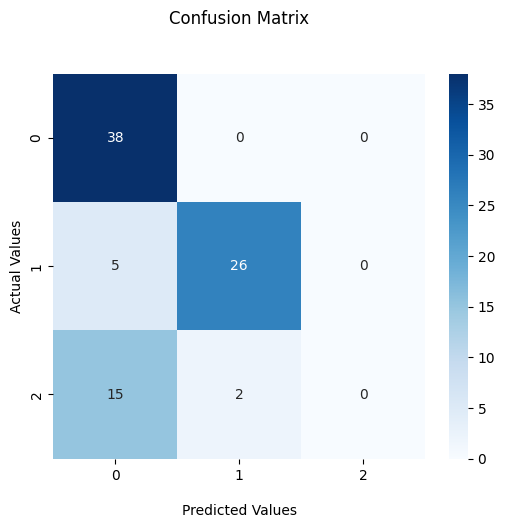

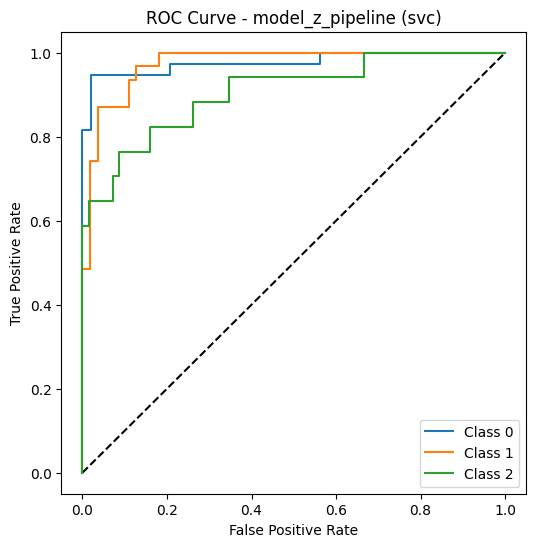

,Model,F1_score,AUC
0,Logistic Regression,0.960616,0.994550
1,KNN,0.933689,0.952271
2,decision tree,0.265678,0.500000
3,svm,0.265678,0.500000
4,forest,0.961259,0.995495
5,adaboost,0.931723,0.957215
6,model_voting,0.970679,0.995289
7,model_z_pipeline (svc),0.667504,0.961606


In [43]:
calculate_metrics(model_pipeline_v1, 'model_z_pipeline (svc)', X_test, y_test)

#### Model SVC w pipeline dał znacznie lepsze rezultaty, co mozna tłumaczyc, że w pipline predykcja była oparta na 4 zmiennych, zaś w poprzednim modelu svc jedynue na 2 zmiennych.

# Zad_15_6

#### Dla stworzonego wcześniej Pipeline’a wybierz najlepsze hiperparametry na podstawie podzbiorów walidacyjnych i siatki hiperparametrów (skorzystaj z GridSearch).

In [51]:
# podział danych na zbiory treningowe/walidacyjne/testowe
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.impute import SimpleImputer
# pcA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [52]:
num_features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']


# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
     ('scaler', StandardScaler()),
    ('pca', PCA())  
])



# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
  
])

model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('svc',SVC(probability=True) )])

In [53]:
params = {
    'preprocessor__numeric_preprocessing__fill_missings__strategy': ['mean', 'median'],
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ["linear", "rbf"]
}

grid_search = GridSearchCV(model_pipeline_v1, params, cv=10, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_z_grid = grid_search.best_estimator_

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Wybrane hiperparametry:  {'preprocessor__numeric_preprocessing__fill_missings__strategy': 'mean', 'preprocessor__numeric_preprocessing__pca__n_components': 0.9, 'svc__C': 10, 'svc__kernel': 'linear'}


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      1.00      1.00        31
           2       1.00      0.94      0.97        17

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



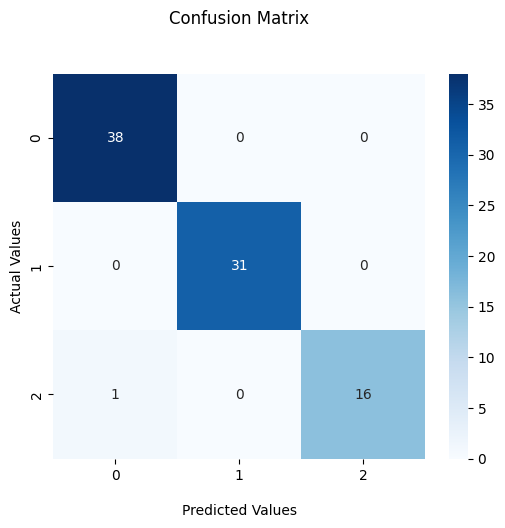

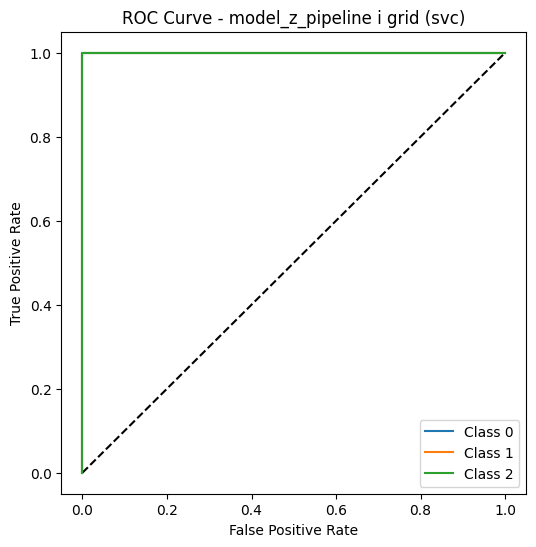

,Model,F1_score,AUC
0,Logistic Regression,0.960616,0.994550
1,KNN,0.933689,0.952271
2,decision tree,0.265678,0.500000
3,svm,0.265678,0.500000
4,forest,0.961259,0.995495
5,adaboost,0.931723,0.957215
6,model_voting,0.970679,0.995289
7,model_z_pipeline (svc),0.667504,0.961606
8,model_z_pipeline i grid (svc),0.988271,1.000000


In [54]:
calculate_metrics(model_z_grid, 'model_z_pipeline i grid (svc)', X_test, y_test)

### Wnioski

'surowy': SVM  F1 = 0.265678, AUC = 0.5. Jest to bardzo slaby klasyfikator, praktycznie losowa klasyfikacja

'model z pipeline SVc' F1 = 0.667504, AUC = 0.961606.  Dzięki preprocesingowi model działa znacznie lepiej niz poprzednik.

'model z pipeline i grid' F1=0.988 , AUC = 1.00.  Model klasyfikuje niemal idealnie (bardzo wysokie F1). Ale AUC=1 moze swiadczyć, że dane są proste do separcji, albo istnieje ryzyko przeuczenie (overfitting)